In [515]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [516]:
breast = load_breast_cancer()

In [517]:
breast_data = breast.data
breast_data.shape

(569, 30)

In [518]:
breast_input = pd.DataFrame(breast_data)

In [519]:
breast_labels = breast.target

In [520]:
labels = np.reshape(breast_labels, (569,1))

In [521]:
final_breast_data = np.concatenate([breast_data,labels], axis=1)

In [522]:
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [523]:
features_labels = np.append(features, 'label')

In [524]:
breast_dataset.columns = features_labels

In [525]:
breast_dataset['label'].replace(0, 'Benign', inplace=True)
breast_dataset['label'].replace(1, 'Malignant', inplace=True)

In [526]:
breast_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [527]:
sc_X = StandardScaler()
breast_input = sc_X.fit_transform(breast_input)

In [528]:
breast_input_copy = breast_input
acc = [None]*9
precision = [None]*9
recall = [None]*9
for i in range(9):
    j=i+1;
    breast_input_copy = breast_input
    pca = PCA(n_components=j)
    breast_input_copy = pca.fit_transform(breast_input_copy)
    X_train, X_test, Y_train, Y_test = train_test_split(breast_input_copy, breast_labels, train_size=0.8, test_size=0.2, random_state=0)
    Classifier = LogisticRegression()
    Classifier.fit(X_train, Y_train)
    Y_pred = Classifier.predict(X_test)
    cnf_matrix = confusion_matrix(Y_test, Y_pred)
    cnf_matrix
    acc[i] = metrics.accuracy_score(Y_test, Y_pred)
    precision[i] = metrics.precision_score(Y_test, Y_pred)
    recall[i] = metrics.recall_score(Y_test, Y_pred)
    print("K:", j)
    print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
    print("Precision:", metrics.precision_score(Y_test, Y_pred))
    print("Recall:", metrics.recall_score(Y_test, Y_pred))
    print("")

K: 1
Accuracy: 0.9035087719298246
Precision: 0.9242424242424242
Recall: 0.9104477611940298

K: 2
Accuracy: 0.9298245614035088
Precision: 0.9682539682539683
Recall: 0.9104477611940298

K: 3
Accuracy: 0.9122807017543859
Precision: 0.9384615384615385
Recall: 0.9104477611940298

K: 4
Accuracy: 0.9473684210526315
Precision: 0.9552238805970149
Recall: 0.9552238805970149

K: 5
Accuracy: 0.956140350877193
Precision: 0.9558823529411765
Recall: 0.9701492537313433

K: 6
Accuracy: 0.956140350877193
Precision: 0.9558823529411765
Recall: 0.9701492537313433

K: 7
Accuracy: 0.956140350877193
Precision: 0.9558823529411765
Recall: 0.9701492537313433

K: 8
Accuracy: 0.956140350877193
Precision: 0.9558823529411765
Recall: 0.9701492537313433

K: 9
Accuracy: 0.9473684210526315
Precision: 0.9552238805970149
Recall: 0.9552238805970149



In [529]:
acc

[0.9035087719298246,
 0.9298245614035088,
 0.9122807017543859,
 0.9473684210526315,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.9473684210526315]

In [530]:
precision

[0.9242424242424242,
 0.9682539682539683,
 0.9384615384615385,
 0.9552238805970149,
 0.9558823529411765,
 0.9558823529411765,
 0.9558823529411765,
 0.9558823529411765,
 0.9552238805970149]

In [531]:
recall

[0.9104477611940298,
 0.9104477611940298,
 0.9104477611940298,
 0.9552238805970149,
 0.9701492537313433,
 0.9701492537313433,
 0.9701492537313433,
 0.9701492537313433,
 0.9552238805970149]

In [532]:
K = [None]*9
for i in range(9):
    print(i)
    K[i] = i+1

0
1
2
3
4
5
6
7
8


In [533]:
K

[1, 2, 3, 4, 5, 6, 7, 8, 9]

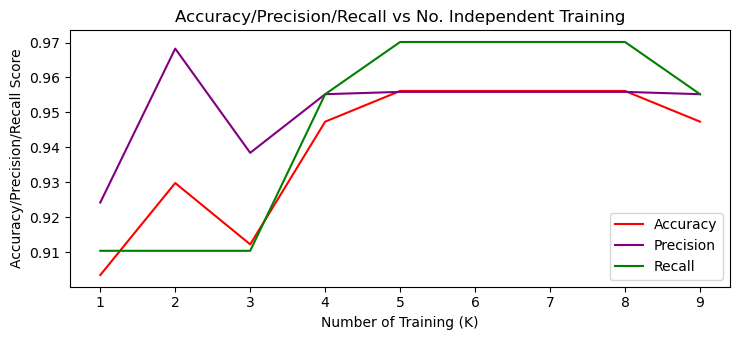

In [535]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

plt.title("Accuracy/Precision/Recall vs No. Independent Training")
plt.xlabel("Number of Training (K)")
plt.ylabel("Accuracy/Precision/Recall Score")
plt.plot(K, acc, label = "Accuracy", color="red")
plt.plot(K, precision, label = "Precision", color="purple")
plt.plot(K, recall, label = "Recall", color="Green")

plt.legend()
plt.show()